In [ ]:
!kaggle datasets download -d taweilo/loan-approval-classification-data

Dataset URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
License(s): apache-2.0
100% 751k/751k [00:00<00:00, 1.59MB/s]
100% 751k/751k [00:00<00:00, 1.59MB/s]


In [ ]:
!unzip /content/loan-approval-classification-data.zip

Archive:  /content/loan-approval-classification-data.zip
  inflating: loan_data.csv           


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


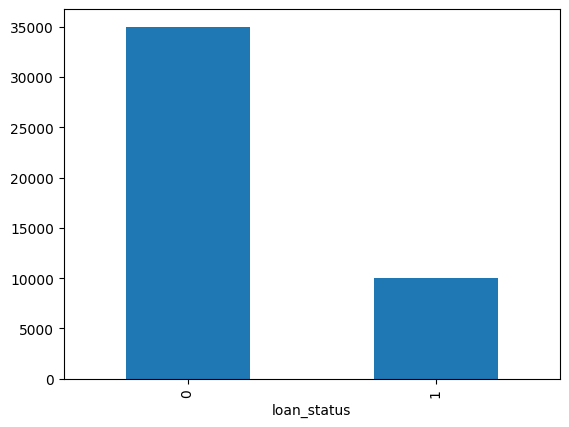

In [ ]:
df['loan_status'].value_counts().plot(kind='bar');

In [ ]:
df.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.384880
loan_int_rate,0.332005
loan_amnt,0.107714
credit_score,-0.007647
cb_person_cred_hist_length,-0.014851
person_emp_exp,-0.020481
person_age,-0.021476
person_income,-0.135808


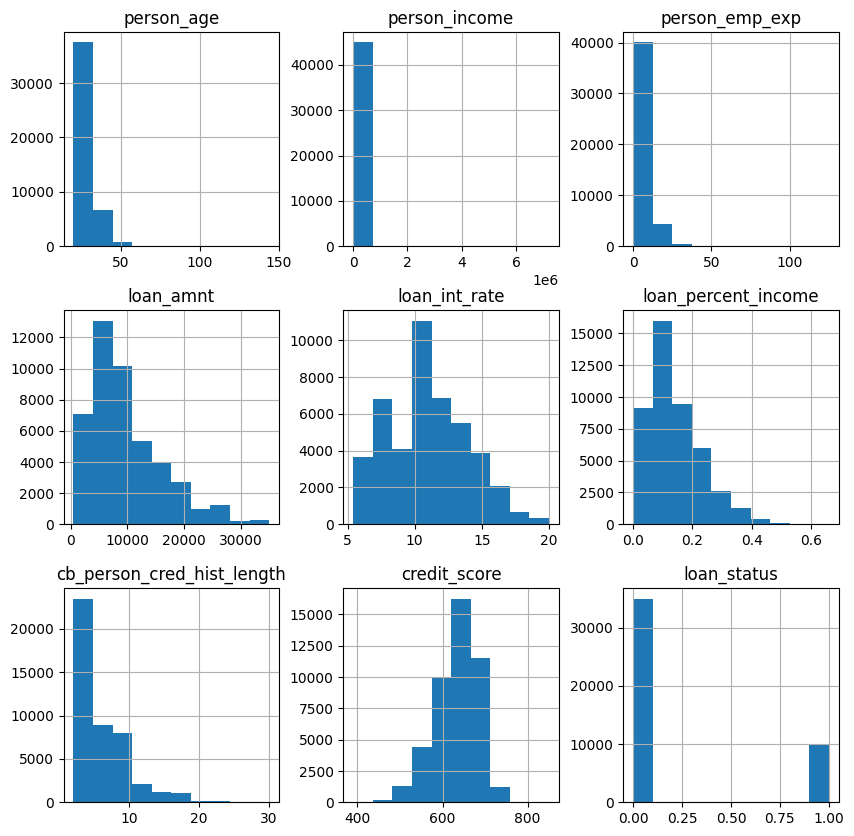

In [ ]:
df.hist(figsize=(10,10));

In [ ]:
df=df.drop(['previous_loan_defaults_on_file','person_gender'],axis=1)
df

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,1
1,21.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,0
2,25.0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,1
3,23.0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,1
4,24.0,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,1
44996,37.0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,1
44997,33.0,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,1
44998,29.0,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,1


In [ ]:
df.loc[df['person_age']>99,'person_age']=95

In [ ]:
if df['loan_status'].isna().sum()>0:
  df=df.dropna(subset=['loan_status'])
df

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,1
1,21.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,0
2,25.0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,1
3,23.0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,1
4,24.0,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,1
44996,37.0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,1
44997,33.0,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,1
44998,29.0,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,1


In [ ]:
X=df.drop('loan_status',axis=1)
y=df['loan_status'].copy()

In [ ]:
# def calculate_class_weight(y):
#   unique_class,class_count=np.unique(y,return_counts=True)
#   total_counts=len(y)
#   class_weights={}
#   for class_label,class_count in zip(unique_class,class_count):
#       class_weight=total_counts/(2*class_count)
#       class_weights[class_label]=class_weight

#   return class_weight

# calculate_class_weight(y)


In [ ]:
weight_0=len(y)/(2*35000)
weight_0

0.6428571428571429

In [ ]:
weight_1=len(y)/(2*10000)
weight_1

2.25

In [ ]:
X.shape

(45000, 11)

In [ ]:
y.shape

(45000,)

In [ ]:
y.value_counts()

,count
loan_status,
0,35000
1,10000


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [ ]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
log_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('trans',FunctionTransformer(np.log,feature_names_out='one-to-one')),
    ('scale',StandardScaler())
])

num_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

cat_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])


transformer=ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features),
    ('log',log_pipeline,['cb_person_cred_hist_length'])
],remainder='passthrough')

estimator=RandomForestClassifier(class_weight={0:0.6428571428571429 , 1:2.25 },random_state = 42)

full_pipeline=Pipeline([
    ('preprocessing',transformer),
    ('estimator',estimator)
])

NameError: name 'Pipeline' is not defined

In [ ]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')),...
                                                                                 sparse_output=False))]),
                                                  Index(['person_education', 'person_home_ownership', 'loan_intent'], dtype='object')),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('trans',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['cb_person_cred_hist_length'])])),
                ('estimator', RandomForestClassifier(random_state=42))])

In [ ]:
full_pipeline.score(X_train,y_train)

1.0

In [ ]:
full_pipeline.score(X_test,y_test)

0.9078888888888889

In [ ]:
from sklearn.metrics import f1_score
X_pred=full_pipeline.predict(X_test)
f1_score(y_test,X_pred)

0.7580974613364458

In [ ]:
from imblearn.pipeline import Pipeline as imPipeline
full_pipeline = imPipeline([
    ('preprocessing', transformer),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('estimator', estimator)
])

full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')),...
                                                  Index(['person_education', 'person_home_ownership', 'loan_intent'], dtype='object')),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('trans',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['cb_person_cred_hist_length'])])),
                ('smote', SMOTE(random_state=42)),
                ('estimator', RandomForestClassifier(random_state=42))])

In [ ]:
X_pred=full_pipeline.predict(X_test)
f1_score(y_test,X_pred)

0.7567713976164681

In [ ]:
# from sklearn.model_selection import GridSearchCV


# param_grid={
#     'estimator__n_estimators':[100,150,200],
#     'estimator__criterion':['gini','entropy','log_loss']
# }

# grid_search=GridSearchCV(full_pipeline,param_grid,cv=3)
# grid_search.fit(X_train,y_train)

In [ ]:
# grid_search.best_params_

In [ ]:
# random_forest=grid_search.best_estimator_
# random_forest.fit(X_train,y_train)

In [ ]:
  # random_forest.score(X_test,y_test)

In [ ]:
# y_train.value_counts()

In [ ]:
# y_test.value_counts()

In [ ]:
# full_pipeline.predict(X_test)

In [ ]:
# y_test == full_pipeline.predict(X_test)

In [ ]:
# df.duplicated().sum()